In [132]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [133]:
train=pd.read_csv('C:/Users/Lenovo/MACHINE LEARNING/titanic/train.csv')
train2=pd.read_csv('C:/Users/Lenovo/MACHINE LEARNING/titanic/train.csv')
test=pd.read_csv('C:/Users/Lenovo/MACHINE LEARNING/titanic/test.csv')
submission=pd.read_csv('C:/Users/Lenovo/MACHINE LEARNING/titanic/sample_submission.csv')



train=pd.concat([train, test], axis=0)

In [134]:
train.isnull().sum()
test.isnull().sum()
train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,NaN
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,NaN
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,NaN
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,NaN


In [135]:
len(train)

12970

In [136]:
len(test)

4277

In [80]:
train.isnull().sum()

PassengerId        0
HomePlanet       288
CryoSleep        310
Cabin            299
Destination      274
Age              270
VIP              296
RoomService      263
FoodCourt        289
ShoppingMall     306
Spa              284
VRDeck           268
Name             294
Transported     4277
dtype: int64

In [137]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12970 entries, 0 to 4276
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   12970 non-null  object 
 1   HomePlanet    12682 non-null  object 
 2   CryoSleep     12660 non-null  object 
 3   Cabin         12671 non-null  object 
 4   Destination   12696 non-null  object 
 5   Age           12700 non-null  float64
 6   VIP           12674 non-null  object 
 7   RoomService   12707 non-null  float64
 8   FoodCourt     12681 non-null  float64
 9   ShoppingMall  12664 non-null  float64
 10  Spa           12686 non-null  float64
 11  VRDeck        12702 non-null  float64
 12  Name          12676 non-null  object 
 13  Transported   8693 non-null   object 
dtypes: float64(6), object(8)
memory usage: 1.5+ MB


In [138]:
cols = list(train.columns)
cat_features = []
num_features = []

for col in cols[1:-2]:
    col_type = train[col].dtype
    cat_features.append(col) if col_type == object else num_features.append(col)

In [83]:
cat_features

['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP']

In [139]:
num_features

['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

<Axes: >

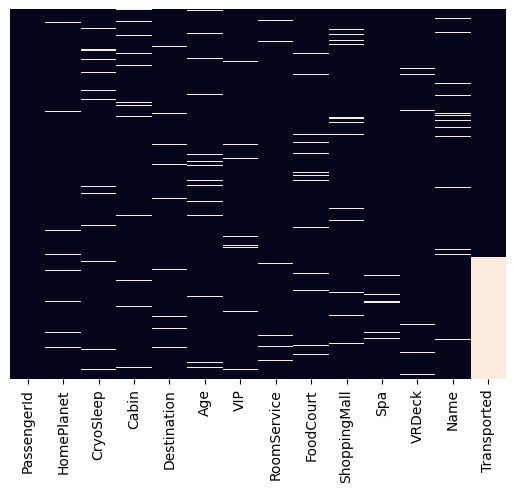

In [140]:
sns.heatmap(train.isnull(), yticklabels=False,cbar=False)

In [141]:
X_train=train.drop(['Transported'],axis=1)
X_train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


<Axes: >

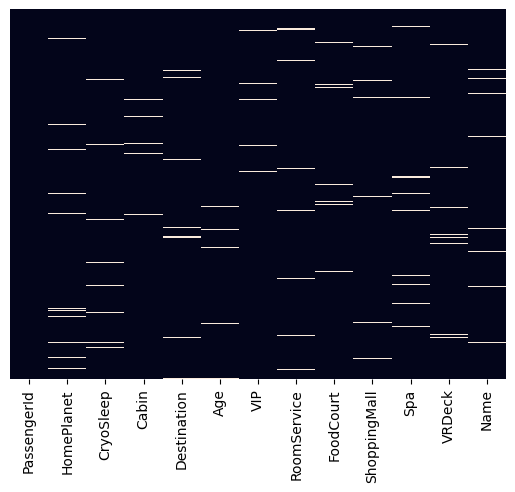

In [142]:
sns.heatmap(test.isnull(), yticklabels=False,cbar=False)

In [88]:
len(train)

12970

In [89]:
test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [90]:
X_train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [143]:
n=X_train.values

In [119]:
print('ok')


ok


In [21]:
X_train.values

array([['0001_01', 'Europa', False, ..., 0.0, 0.0, 'Maham Ofracculy'],
       ['0002_01', 'Earth', False, ..., 549.0, 44.0, 'Juanna Vines'],
       ['0003_01', 'Europa', False, ..., 6715.0, 49.0, 'Altark Susent'],
       ...,
       ['9271_01', 'Mars', True, ..., 0.0, 0.0, 'Jayrin Pore'],
       ['9273_01', 'Europa', False, ..., 0.0, 523.0, 'Kitakan Conale'],
       ['9277_01', 'Earth', True, ..., 0.0, 0.0, 'Lilace Leonzaley']],
      dtype=object)

In [144]:
for cat_col in cat_features:
    train[cat_col]=train[cat_col].fillna(train[cat_col].mode()[0])
    print(cat_col,train[cat_col].isnull().sum())
for num_col in num_features:
    train[num_col] = train[num_col].fillna(train[num_col].mean())       
    print(num_col,train[num_col].isnull().sum())

HomePlanet 0
CryoSleep 0
Cabin 0
Destination 0
VIP 0
Age 0
RoomService 0
FoodCourt 0
ShoppingMall 0
Spa 0
VRDeck 0


In [146]:
#sns.heatmap(train.isnull(), yticklabels=False,cbar=False)


train=train.drop(['Name'],axis=1)
train=train.drop(['Transported'],axis=1)
train=train.drop(['PassengerId'],axis=1)
#train=train.drop(['Cabin'],axis=1)

#sns.heatmap(train.isnull(), yticklabels=False,cbar=False)

train['VIP']=train['VIP'].astype('int')
train['CryoSleep']=train['CryoSleep'].astype('int')
train

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,Europa,0,B/0/P,TRAPPIST-1e,39.000000,0,0.0,0.0,0.0,0.0,0.0
1,Earth,0,F/0/S,TRAPPIST-1e,24.000000,0,109.0,9.0,25.0,549.0,44.0
2,Europa,0,A/0/S,TRAPPIST-1e,58.000000,1,43.0,3576.0,0.0,6715.0,49.0
3,Europa,0,A/0/S,TRAPPIST-1e,33.000000,0,0.0,1283.0,371.0,3329.0,193.0
4,Earth,0,F/1/S,TRAPPIST-1e,16.000000,0,303.0,70.0,151.0,565.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
4272,Earth,1,G/1496/S,TRAPPIST-1e,34.000000,0,0.0,0.0,0.0,0.0,0.0
4273,Earth,0,G/160/P,TRAPPIST-1e,42.000000,0,0.0,847.0,17.0,10.0,144.0
4274,Mars,1,D/296/P,55 Cancri e,28.771969,0,0.0,0.0,0.0,0.0,0.0
4275,Europa,0,D/297/P,TRAPPIST-1e,28.771969,0,0.0,2680.0,0.0,0.0,523.0


In [195]:
#y_pred2=y_pred.astype(bool)
#y_pred2
#cat_features.columns
#cols=list(cat_features.columns)
#num=list(num_features)
#cols
#def cat_2_num (cols):
    
   # for col in cols:
        
    #    cat_features[col]=pd.get_dummies(cat_features[col],drop_first=True)
        
#cat_2_num (cols)        


#j=len(cat_features)
#j

train['Deck'] = train['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else 'M')
train['Port'] = train['Cabin'].apply(lambda s: s[-1] if pd.notnull(s) else 'M')
train['Deck'] = train['Deck'].map({'B':0, 'F':1, 'A':2, 'G':3, 'E':4, 'D':5, 'C':6, 'T':7}).astype(int)
train['Port'] = train['Port'].map({'P':0, 'S':1}).astype(int)
train.drop(['Cabin'], axis=1, inplace=True)

#unique_destinations = train["Destination"].unique()
#train["Destination"] = train["Destination"].map(dict(zip(unique_destinations,list(range(len(unique_destinations)))))).astype(int)
#df_ml=pd.concat([])

from sklearn.preprocessing import LabelEncoder
la=LabelEncoder()
#train[:,2]=la.fit_transform(train[:,2])

label_encoder = LabelEncoder()
  
# Encode labels in column 'species'.
#train['HomePlanet']= label_encoder.fit_transform(train['HomePlanet'].map({'Earth':0, 'Europa':1, 'Mars':2}))

train['HomePlanet']= label_encoder.fit_transform(train['HomePlanet'])
#train['Cabin']= label_encoder.fit_transform(train['Cabin'])
train['Destination']= label_encoder.fit_transform(train['Destination'])
X_train=train
train

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Port
0,1,0,0,39.000000,0,0.0,0.0,0.0,0.0,0.0,0,0
1,0,0,0,24.000000,0,109.0,9.0,25.0,549.0,44.0,1,1
2,1,0,0,58.000000,1,43.0,3576.0,0.0,6715.0,49.0,2,1
3,1,0,0,33.000000,0,0.0,1283.0,371.0,3329.0,193.0,2,1
4,0,0,0,16.000000,0,303.0,70.0,151.0,565.0,2.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4272,0,1,0,34.000000,0,0.0,0.0,0.0,0.0,0.0,3,1
4273,0,0,0,42.000000,0,0.0,847.0,17.0,10.0,144.0,3,0
4274,2,1,2,28.771969,0,0.0,0.0,0.0,0.0,0.0,5,0
4275,1,0,0,28.771969,0,0.0,2680.0,0.0,0.0,523.0,5,0


In [197]:
#submission_file=common['Transported']
#data_new1['x1'] = data_new1['x1'].astype(bool) =y_pred.astype(bool)
#data_new1['x1'] = data_new1['x1'].astype(bool) 
#df = pd.DataFrame(y_pred)
#cat = pd.get_dummies(cat_features, drop_first = True).astype(int)
#cat


train = train.loc[:,~train.columns.duplicated()]


m_train1=train.iloc[:8693,:]

y_train2=train2['Transported'].astype(int)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(m_train1,y_train2,test_size=0.2,random_state=42)

X_train.shape,y_train.shape, X_test.shape, y_test.shape
m_test=train.iloc[8693:,:]

X_train

#X_train=m_train.drop(['SalePrice'],axis=1)





,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Port
2333,0,0,0,28.0,0,0.000000,55.0,0.0,656.0,0.0,3,0
2589,0,0,0,17.0,0,0.000000,1195.0,31.0,0.0,0.0,1,0
8302,1,1,2,28.0,0,0.000000,0.0,0.0,0.0,0.0,6,1
8177,2,0,0,20.0,0,222.897852,2.0,289.0,976.0,0.0,1,0
500,1,1,2,36.0,0,0.000000,0.0,0.0,0.0,0.0,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5734,0,0,0,18.0,0,14.000000,2.0,144.0,610.0,0.0,3,1
5191,2,0,0,50.0,0,690.000000,0.0,30.0,762.0,428.0,1,1
5390,0,0,1,22.0,0,158.000000,0.0,476.0,0.0,26.0,1,0
860,2,0,0,34.0,0,379.000000,0.0,1626.0,0.0,0.0,1,0


In [192]:


lg = LogisticRegression()
lg.fit(X_train,y_train)
lg_pred_score = lg.score(X_test,y_test)

from sklearn.metrics import accuracy_score
#accuracy_score(lg_pred_score,y_test)


df = pd.DataFrame(dict(model=['Logistic Regression'],accuracy=[lg_pred_score, ]))
df


C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,model,accuracy
0,Logistic Regression,0.774583


In [198]:
y_pred = regressor.predict(m_test)

In [199]:
y_pred

array([1, 0, 1, ..., 1, 1, 1])

In [122]:
len(y_pred)

4277

In [101]:
s=submission[['PassengerId']].to_numpy()

In [68]:
len(s)

4277

In [66]:
pd.concat([test[['PassengerId']],submission[['PassengerId']]]).drop_duplicates(keep=False)

,PassengerId
6,0029_01
11,0040_01
15,0046_02
21,0049_01
38,0094_01
...,...
4248,9223_01
4251,9229_01
4255,9238_02
4274,9271_01


In [69]:
common = test.merge(submission, on=['PassengerId'])
    

In [70]:
common

,PassengerId,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0013_01,27.0,0.0,0.0,0.0,0.0,0.0,False
1,0018_01,19.0,0.0,9.0,0.0,2823.0,0.0,False
2,0019_01,31.0,0.0,0.0,0.0,0.0,0.0,False
3,0021_01,38.0,0.0,6652.0,0.0,181.0,585.0,False
4,0023_01,20.0,10.0,0.0,635.0,0.0,0.0,False
...,...,...,...,...,...,...,...,...
3735,9265_01,43.0,47.0,0.0,3851.0,0.0,0.0,False
3736,9266_01,40.0,0.0,865.0,0.0,3.0,0.0,False
3737,9266_02,34.0,0.0,0.0,0.0,0.0,0.0,False
3738,9269_01,42.0,0.0,847.0,17.0,10.0,144.0,False


In [73]:
submission_file=common['Transported']

In [77]:
submission_file

0       False
1       False
2       False
3       False
4       False
        ...  
3735    False
3736    False
3737    False
3738    False
3739    False
Name: Transported, Length: 3740, dtype: bool

In [112]:
s=submission_file.to_numpy()

In [113]:
s

array([False, False, False, ..., False, False, False])

In [180]:
from sklearn.metrics import accuracy_score
accuracy_score(s,y_pred)

In [183]:
accuracy_score(s,y_pred)

0.0